In [0]:
pip install prophet

Python interpreter will be restarted.
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732018 sha256=1e994193f85866abb1a8b735f3c830e1ad8680a8532343ca2753a57a8234fd53
  Stored in directory: /root/.cache/pip/wheels/04/1f/e5/8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
Successfully built pymeeus
Python interpreter will be restarted.


In [0]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot
from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go

In [0]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX032NEN/images/data/long_data_.csv')

In [0]:
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


In [0]:
df

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9
...,...,...,...,...,...,...
16594,Manipur,NER,24.799971,93.950017,05/12/2020 00:00:00,2.5
16595,Meghalaya,NER,25.570492,91.880014,05/12/2020 00:00:00,5.8
16596,Mizoram,NER,23.710399,92.720015,05/12/2020 00:00:00,1.6
16597,Nagaland,NER,25.666998,94.116570,05/12/2020 00:00:00,2.1


In [0]:
df.shape

Out[77]: (16599, 6)

In [0]:
df.dtypes

Out[78]: States        object
Regions       object
latitude     float64
longitude    float64
Dates         object
Usage        float64
dtype: object

In [0]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [0]:
#after converting the date to pandas data type
df.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,2019-02-01,119.9
1,Haryana,NR,28.450006,77.019991,2019-02-01,130.3
2,Rajasthan,NR,26.449999,74.639981,2019-02-01,234.1
3,Delhi,NR,28.669993,77.230004,2019-02-01,85.8
4,UP,NR,27.599981,78.050006,2019-02-01,313.9


In [0]:
df = df.groupby('Dates',as_index=False).mean()
print(df.head())

       Dates  latitude  longitude       Usage
0 2019-01-07  23.17822  81.794533  103.736364
1 2019-01-08  23.17822  81.794533  113.951515
2 2019-01-09  23.17822  81.794533  107.836364
3 2019-01-10  23.17822  81.794533   98.045455
4 2019-01-11  23.17822  81.794533   84.463636


In [0]:
df.shape

Out[12]: (498, 4)

In [0]:
df = df[['Dates','Usage']]
print(df)

         Dates       Usage
0   2019-01-07  103.736364
1   2019-01-08  113.951515
2   2019-01-09  107.836364
3   2019-01-10   98.045455
4   2019-01-11   84.463636
..         ...         ...
493 2020-05-19  107.051515
494 2020-05-20  107.712121
495 2020-05-21  107.730303
496 2020-05-22  106.518182
497 2020-05-23  101.854545

[498 rows x 2 columns]


In [0]:
# fig = px.line_geo()
#help(fig)
help(px.line)

Help on function line in module plotly.express._chart_types:

line(data_frame=None, x=None, y=None, line_group=None, color=None, line_dash=None, symbol=None, hover_name=None, hover_data=None, custom_data=None, text=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, orientation=None, color_discrete_sequence=None, color_discrete_map=None, line_dash_sequence=None, line_dash_map=None, symbol_sequence=None, symbol_map=None, markers=False, log_x=False, log_y=False, range_x=None, range_y=None, line_shape=None, render_mode='auto', title=None, template=None, width=None, height=None)
        In a 2D line plot, each row of `data_frame` is represented as vertex of
        a polyline mark in 2D space.
        
    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
        This ar

In [0]:
fig = px.line(df,x='Dates',y='Usage', title='Dates vs usage')
fig.show()

In [0]:
#for prophet we need to change the column names as ds & y
df.columns = ['ds','y']
df.head()

,ds,y
0,2019-01-07,103.736364
1,2019-01-08,113.951515
2,2019-01-09,107.836364
3,2019-01-10,98.045455
4,2019-01-11,84.463636


In [0]:
model = Prophet()

In [0]:
model.fit(df)

11:10:30 - cmdstanpy - INFO - Chain [1] start processing
11:10:30 - cmdstanpy - INFO - Chain [1] done processing


Out[88]: <prophet.forecaster.Prophet at 0x7f1dc19c2df0>

In [0]:
model.component_modes

Out[89]: {'additive': ['weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [0]:
future_dates = model.make_future_dataframe(periods=365,freq='d',include_history=True)
future_dates.shape

Out[24]: (863, 1)

In [0]:
future_dates.head()

,ds
0,2019-01-07
1,2019-01-08
2,2019-01-09
3,2019-01-10
4,2019-01-11


In [0]:
prediction=model.predict(future_dates)

In [0]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-07,103.380111,91.117467,115.359221,103.380111,103.380111,-0.184879,-0.184879,-0.184879,-0.184879,-0.184879,-0.184879,0.0,0.0,0.0,103.195232
1,2019-01-08,103.377977,90.931775,116.151192,103.377977,103.377977,0.650401,0.650401,0.650401,0.650401,0.650401,0.650401,0.0,0.0,0.0,104.028379
2,2019-01-09,103.375844,90.628156,116.323265,103.375844,103.375844,0.151418,0.151418,0.151418,0.151418,0.151418,0.151418,0.0,0.0,0.0,103.527261
3,2019-01-10,103.373710,90.358985,115.478977,103.373710,103.373710,-0.293238,-0.293238,-0.293238,-0.293238,-0.293238,-0.293238,0.0,0.0,0.0,103.080472
4,2019-01-11,103.371576,91.419602,115.974484,103.371576,103.371576,-0.470827,-0.470827,-0.470827,-0.470827,-0.470827,-0.470827,0.0,0.0,0.0,102.900750


In [0]:
trace_open = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat"],
    mode = 'lines',
    name="Forecast"
)
trace_high = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat_upper"],
    mode = 'lines',
    fill = "tonexty", 
    line = {"color": "#57b8ff"}, 
    name="Higher uncertainty interval"
)
trace_low = go.Scatter(
    x = prediction["ds"],
    y = prediction["yhat_lower"],
    mode = 'lines',
    fill = "tonexty", 
    line = {"color": "#57b8ff"}, 
    name="Lower uncertainty interval"
)
trace_close = go.Scatter(
    x = df["ds"],
    y = df["y"],
    name="Data values"
)

#make list for all three scattle objects.
data = [trace_open,trace_high,trace_low,trace_close]
# Construct a new Layout object. 
#title - It will display string as a title of graph
layout = go.Layout(title="Power consumption forecasting")
#A list or tuple of trace instances (e.g. [Scatter(…), Bar(…)]) or A single trace instance (e.g. Scatter(…), Bar(…), etc.)
#A list or tuple of dicts of string/value properties where: - The ‘type’ property specifies the trace type.

fig = go.Figure(data=data)
fig.show()

In [0]:
fig = go.Figure([go.Scatter(x=df['ds'], y=df['y'],mode='lines',
                    name='Actual')])
#You can add traces using an Express plot by using add_trace
fig.add_trace(go.Scatter(x=prediction['ds'], y=prediction['yhat'],
                   mode='lines+markers',
                    name='predicted'))
#To display a figure using the renderers framework, you call the .show() method on a graph object figure, or pass the figure to the plotly.io.show function. 
#With either approach, plotly.py will display the figure using the current default renderer(s).
fig.show()

In [0]:
#Return a Numpy representation of the DataFrame.
y_true = df['y'].values

#Here we have specified [:498] because in y_true we have 498 data points so for comparing both series we need equal shape of series.
y_pred = prediction['yhat'][:498].values 

#Parameters:
#y_truearray-like of shape = (n_samples) or (n_samples, n_outputs)
#Ground truth (correct) target values.

#y_predarray-like of shape = (n_samples) or (n_samples, n_outputs)
#Estimated target values.

mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 7.910


In [0]:
model1=Prophet(daily_seasonality=True).add_seasonality(name='yearly',period=365,fourier_order=70)

In [0]:
model1.fit(df)

10:06:11 - cmdstanpy - INFO - Chain [1] start processing
10:06:11 - cmdstanpy - INFO - Chain [1] done processing


Out[32]: <prophet.forecaster.Prophet at 0x7f1de9331c40>

In [0]:
model1.component_modes

Out[33]: {'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [0]:
future_dates1=model1.make_future_dataframe(periods=365)

In [0]:
prediction1=model1.predict(future_dates1)

In [0]:
from sklearn.metrics import mean_absolute_error
y_true = df['y'].values
y_pred = prediction1['yhat'][:498].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 5.600


In [0]:
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=df['ds'], y=df['y'],mode='lines',
                    name='Actual')])

fig.add_trace(go.Scatter(x=prediction1['ds'], y=prediction1['yhat'],
                   mode='lines+markers',
                    name='predicted'))

fig.show()

In [0]:
#read CSV file
df1=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX032NEN/images/data/energydata_complete.csv')

In [0]:
df1.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [0]:
df1 = df1[['date','Appliances']]

In [0]:
df1.head()

,date,Appliances
0,11-01-2016 17:00,60
1,11-01-2016 17:10,60
2,11-01-2016 17:20,50
3,11-01-2016 17:30,50
4,11-01-2016 17:40,60


In [0]:
df1['date'] = pd.to_datetime(df1['date'])
df1.head()

,date,Appliances
0,2016-11-01 17:00:00,60
1,2016-11-01 17:10:00,60
2,2016-11-01 17:20:00,50
3,2016-11-01 17:30:00,50
4,2016-11-01 17:40:00,60


Out[45]: <AxesSubplot:>

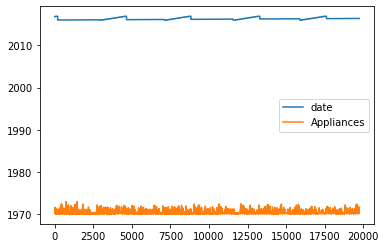

In [0]:
df1.plot()

In [0]:
df1.columns = ['ds','y']
df1.head()

,ds,y
0,2016-11-01 17:00:00,60
1,2016-11-01 17:10:00,60
2,2016-11-01 17:20:00,50
3,2016-11-01 17:30:00,50
4,2016-11-01 17:40:00,60


In [0]:
model2= Prophet()

In [0]:
model2.fit(df)

10:26:53 - cmdstanpy - INFO - Chain [1] start processing
10:26:56 - cmdstanpy - INFO - Chain [1] done processing


Out[58]: <prophet.forecaster.Prophet at 0x7f1dc3ff86a0>

In [0]:
model2.component_modes

Out[59]: {'additive': ['weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [0]:
future_dates=model2.make_future_dataframe(periods=150)

In [0]:
prediction=model2.predict(future_dates)

In [0]:
y_true = df['y'].values
y_pred = prediction['yhat'][:19735].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 75.395


In [0]:
fig = go.Figure([go.Scatter(x=df['ds'], y=df['y'],mode='lines',
                    name='Actual')])
#You can add traces using an Express plot by using add_trace
fig.add_trace(go.Scatter(x=prediction['ds'], y=prediction['yhat'],
                   mode='lines+markers',
                    name='predicted'))
#To display a figure using the renderers framework, you call the .show() method on a graph object figure, or pass the figure to the plotly.io.show function. 
#With either approach, plotly.py will display the figure using the current default renderer(s).
fig.show()